In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris
X = iris.get('data')
y = iris.get('target')
y = y.reshape(-1, 1)
dataframe = np.concatenate((X, y), axis = 1)
dataframe
df = pd.DataFrame(dataframe)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df['species'] = pd.Categorical.from_codes(iris.get('target'), iris.get('target_names'))
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
import seaborn as sns
sns.pairplot(df, hue = 'species', markers = ['o', 's', 'd'])

In [7]:
from sklearn.neighbors import KNeighborsClassifier
y = y.reshape(-1)
knn_1 = KNeighborsClassifier(n_neighbors = 1)
knn_1.fit(X, y)
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_5.fit(X, y)
from sklearn.linear_model import LogisticRegression
log_reg_1 = LogisticRegression()
log_reg_1.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
num_1 = np.array([3, 4, 4, 2])
num_1 = num_1.reshape(1, -1)
knn_1.predict(num_1)
knn_5.predict(num_1)
log_reg_1.predict(num_1)
num_2 = np.array([4, 4, 3, 2])
num_2 = num_1.reshape(1, -1)
knn_1.predict(num_2)
knn_5.predict(num_2)
log_reg_1.predict(num_2)

array([2])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 90)
knn_5_2 = KNeighborsClassifier(n_neighbors = 5)
knn_5_2.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
preds = knn_5_2.predict(X_test)
accuracy_score(y_true = y_test, y_pred = preds)
neighbours = list(range(1, 26))
score = []
for i in neighbours:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    preds_neighbors = clf.predict(X_test)
    score.append(accuracy_score(y_true = y_test, y_pred = preds_neighbors))
score

(150, 4) (150,) (105, 4) (45, 4) (105,) (45,)


[0.9555555555555556,
 0.9333333333333333,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

Text(0, 0.5, 'Testing Accuracy')

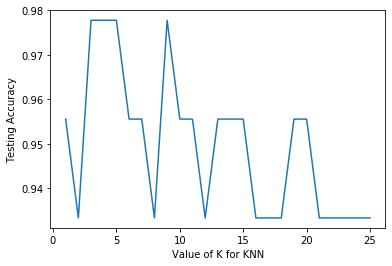

In [10]:
import matplotlib.pyplot as plt
plt.plot(neighbours, score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


In [11]:
#Best model: k = 6